In [1]:
import pandas as pd
import numpy as np
import re
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/liron/OneDrive - Ariel University/Toar 1/third year/Yeda&Netunim/Jupyter/matala2_cosmetics_2019-Nov.csv")
# data.head

<ipython-input-2-f631b72ccc9e>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/liron/OneDrive - Ariel University/Toar 1/third year/Yeda&Netunim/Jupyter/matala2_cosmetics_2019-Nov.csv")


### Check the type of event_time & Nan

In [3]:
data = data.dropna(subset=['user_session'])

In [96]:
data.info()
null_counts = data.isnull().sum()

# Print the null counts for each column
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635024 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   event_time     object
 1   event_type     object
 2   product_id     int64 
 3   category_id    int64 
 4   category_code  object
 5   brand          object
 6   price          object
 7   user_id        int64 
 8   user_session   object
dtypes: int64(3), object(6)
memory usage: 353.6+ MB
event_time             0
event_type             0
product_id             0
category_id            0
category_code    4559286
brand            1985713
price                  0
user_id                0
user_session           0
dtype: int64


# Q1

In [4]:
data['event_time'] = pd.to_datetime(data['event_time'])
data = data.sort_values(by=['user_id', 'event_time','user_session'])
data['duration_to_next_event'] = data.groupby(['user_id', 'user_session'])['event_time'].diff().dt.total_seconds().fillna(0)
data [30:60]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
2648998,2019-11-20 13:01:15+00:00,view,5838771,1487580005998265217,NaN,bluesky,2.38,1458813,921ff98c-a419-4132-af94-ee26880334b0,71.0
2741454,2019-11-21 06:02:40+00:00,view,5711087,1487580005008409427,NaN,f.o.x,6.03,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,0.0
1489955,2019-11-11 18:02:09+00:00,view,5745712,1487580006317032337,NaN,runail,8.73,5493470,dad8b91c-b700-4be1-9f14-e80af656d441,0.0
1490003,2019-11-11 18:02:35+00:00,cart,5745712,1487580006317032337,NaN,runail,8.73,5493470,dad8b91c-b700-4be1-9f14-e80af656d441,26.0
1490085,2019-11-11 18:03:18+00:00,view,49674,1487580006317032337,NaN,runail,1.11,5493470,dad8b91c-b700-4be1-9f14-e80af656d441,43.0
1490141,2019-11-11 18:03:41+00:00,cart,49674,1487580006317032337,NaN,runail,1.11,5493470,dad8b91c-b700-4be1-9f14-e80af656d441,23.0
1490182,2019-11-11 18:04:06+00:00,cart,5587748,1487580006317032337,NaN,irisk,1.9,5493470,dad8b91c-b700-4be1-9f14-e80af656d441,25.0
1490637,2019-11-11 18:07:49+00:00,view,4590,1487580006317032337,NaN,NaN,4.92,5493470,dad8b91c-b700-4be1-9f14-e80af656d441,223.0
1490674,2019-11-11 18:08:11+00:00,cart,4590,1487580006317032337,NaN,NaN,4.92,5493470,dad8b91c-b700-4be1-9f14-e80af656d441,22.0
1490762,2019-11-11 18:09:12+00:00,view,5815680,1487580006317032337,NaN,NaN,12.57,5493470,dad8b91c-b700-4be1-9f14-e80af656d441,61.0


# Q2

In [5]:
data = data.sort_values(by=['user_id','event_time'])
data['days_diff'] = data.groupby(['user_id'])['event_time'].diff().dt.days
data['funnel_number'] = np.where(data['days_diff'].fillna(0)>5,1,0)
data['funnel_number'] = data.groupby('user_id')['funnel_number'].cumsum()+1
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,days_diff,funnel_number
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,NaN,1
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,NaN,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,0.0,1
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0.0,1.0,1
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,14.0,0.0,1
4635736,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,0.0,1
4635737,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,0.0,1
4635752,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,NaN,1


# Q3

In [6]:
data = data.sort_values(by=['user_id','user_session','event_time'])
data['session_shift'] = data['user_session'].shift()
data['session_same'] = np.where(data['session_shift']==data['user_session'],0,1)
data['index_in_funnel'] = data.groupby(['user_id','funnel_number'])['session_same'].cumsum()
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,days_diff,funnel_number,session_shift,session_same,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,NaN,1,None,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,0.0,1,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0.0,1.0,1,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,0.0,1,921ff98c-a419-4132-af94-ee26880334b0,0,2
2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,0.0,1,921ff98c-a419-4132-af94-ee26880334b0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,14.0,0.0,1,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0,1
4635736,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,0.0,1,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0,1
4635737,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,0.0,1,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0,1
4635752,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,NaN,1,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1


# Q4

In [102]:
def price_float(price):
    if (not isinstance(price, float)):
        if (re.search('[0-9]*\.[0-9]*', price)):
            price = re.findall('[0-9]*\.[0-9]*', price)[0]
        elif (isinstance(price, float)):
            price = float(price)
    else:
        price = float(price)
    return price


data['price'] = data['price'].apply(price_float).reset_index(drop=True)

# Q5

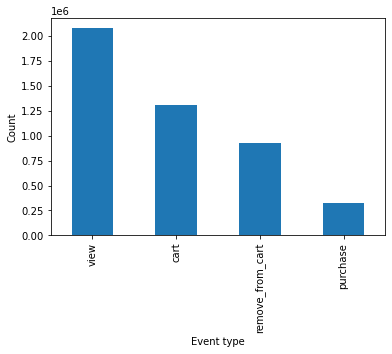

In [103]:
event_counts = data['event_type'].value_counts()

# plot the result using a bar chart
fig, ax = plt.subplots()
event_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Event type')
ax.set_ylabel('Count')
plt.show()

# Q6

## a-d

In [104]:
session_data = data.groupby(['user_session']).agg({
    "user_id" : 'first',
    'funnel_number' : 'first',
    'index_in_funnel' : 'first',
    "duration_to_next_event" : lambda x: list(x),
    'event_type' : lambda x: list(x),
    'product_id' :lambda x: list(x),
})

In [105]:
#e 
session_data['event_count'] = session_data['duration_to_next_event'].apply(len)
#f
session_data['event_sum'] = session_data['duration_to_next_event'].apply(sum)

#g
def viewed_products(row):
    lst = []
    for i in range(len(row['event_type'])):
        if row['event_type'][i] == "view":
            lst.append(row['product_id'][i])
    return lst

session_data['list_of_viewed'] = session_data.apply(viewed_products, axis=1)

#h
def cart_products(row):
    lst = []
    for i in range(len(row['event_type'])):
        if row['event_type'][i] == "cart":
            lst.append(row['product_id'][i])
    return lst

session_data['list_of_added_to_cart '] = session_data.apply(cart_products, axis=1)

#i
def purchase_products(row):
    lst = []
    for i in range(len(row['event_type'])):
        if row['event_type'][i] == "purchase":
            lst.append(row['product_id'][i])
    return lst

session_data['list_of_purchased'] = session_data.apply(purchase_products, axis=1)

In [109]:
session_data

,user_id,funnel_number,index_in_funnel,duration_to_next_event,event_type,product_id,event_count,event_sum,list_of_viewed,list_of_added_to_cart,list_of_purchased
user_session,,,,,,,,,,,
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,556321594,1,1,[0.0],[view],[5829298],1,0.0,[5829298],[],[]
00001bc6-1e04-4861-be5d-1bc73929c21a,570103701,1,1,[0.0],[view],[5771614],1,0.0,[5771614],[],[]
00001e77-5db8-4e96-ab7a-022ed3caf8b3,571677620,1,1,[0.0],[view],[5568472],1,0.0,[5568472],[],[]
00004c7d-9507-474e-a559-0fdaccaaa390,504468592,2,1,[0.0],[view],[5864850],1,0.0,[5864850],[],[]
0000597b-de39-4a77-9fe5-02c8792ca14e,571211128,1,1,"[0.0, 56.0, 95.0]","[view, view, view]","[5861620, 5861619, 5861591]",3,151.0,"[5861620, 5861619, 5861591]",[],[]
...,...,...,...,...,...,...,...,...,...,...,...
ffff5096-a5d3-4abf-b34b-9627203bb025,576334415,1,1,[0.0],[view],[5790563],1,0.0,[5790563],[],[]
ffff5954-5b7f-4dd8-9fa1-078ae32e684f,577542926,1,2,"[0.0, 74.0]","[view, view]","[5588154, 5676246]",2,74.0,"[5588154, 5676246]",[],[]
ffff8044-2a22-4846-8a72-999e870abbe9,560528468,1,9,[0.0],[view],[5847328],1,0.0,[5847328],[],[]
